# Classification Tasks

## 1. Traffic Level classification
In this task, we classify traffic levels into Low, Medium, and High based on the 'Total' field. 

### Step 1: Import Libraries and Load the Dataset
- We start by importing the required libraries for data manipulation, model training, and evaluation.
- We load the dataset and convert the `Date` column to a datetime format for potential future time-related analysis.

In [21]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset and convert the 'Date' column to datetime format
df = pd.read_csv('/Users/sarek/PycharmProjects/cs5483_g29/dataset/hkdata_2023_2024.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
df.head()


,Date,Control Point,Arrival / Departure,Hong Kong Residents,Mainland Visitors,Other Visitors,Total,DayType,Year,Quarter
0,2023-01-01,Airport,Arrival,24925,1687,2456,29068,Weekend,2023,Q1
1,2023-01-01,Airport,Departure,14591,1648,4644,20883,Weekend,2023,Q1
2,2023-01-01,Express Rail Link West Kowloon,Arrival,0,0,0,0,Weekend,2023,Q1
3,2023-01-01,Express Rail Link West Kowloon,Departure,0,0,0,0,Weekend,2023,Q1
4,2023-01-01,Hung Hom,Arrival,0,0,0,0,Weekend,2023,Q1


### Step 2: Feature Engineering & One Hot Encoding
- We use quantile-based binning on `Total` to create the classification target
- We use features except `Total`, `Hong Kong Residents`, `China Residents`, `Other Residents` and `Other Residents`

In [ ]:
df['TrafficLevel'] = pd.qcut(df['Total'], q=3, labels=['Low', 'Medium', 'High'])

feature_cols = [
    'Control Point', 'DayType', 'Year', 'Quarter', 'Arrival / Departure',
]

X_full = df[feature_cols]
y = df['TrafficLevel']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X_full, drop_first=True)
X_encoded.head()

,Year,Control Point_China Ferry Terminal,Control Point_Express Rail Link West Kowloon,Control Point_Harbour Control,Control Point_Heung Yuen Wai,Control Point_Hong Kong-Zhuhai-Macao Bridge,Control Point_Hung Hom,Control Point_Kai Tak Cruise Terminal,Control Point_Lo Wu,Control Point_Lok Ma Chau,Control Point_Lok Ma Chau Spur Line,Control Point_Macau Ferry Terminal,Control Point_Man Kam To,Control Point_Sha Tau Kok,Control Point_Shenzhen Bay,DayType_Weekend,Quarter_Q2,Quarter_Q3,Quarter_Q4,Arrival / Departure_Departure
0,2023,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,2023,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
2,2023,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,2023,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
4,2023,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False


### Step 3: Feature Importance Evaluation
We fit a Random Forest classifier on the full dataset to measure feature importance.

Feature Importance Ranking:
                                         Feature  Importance
3                  Control Point_Harbour Control    0.103105
13                     Control Point_Sha Tau Kok    0.099174
6                         Control Point_Hung Hom    0.085946
11            Control Point_Macau Ferry Terminal    0.084317
9                      Control Point_Lok Ma Chau    0.075898
7          Control Point_Kai Tak Cruise Terminal    0.073279
1             Control Point_China Ferry Terminal    0.062119
0                                           Year    0.056495
10           Control Point_Lok Ma Chau Spur Line    0.054996
8                            Control Point_Lo Wu    0.054059
12                      Control Point_Man Kam To    0.053036
15                               DayType_Weekend    0.032458
4                   Control Point_Heung Yuen Wai    0.028368
14                    Control Point_Shenzhen Bay    0.025873
18                                    Quarter_Q4    0.024

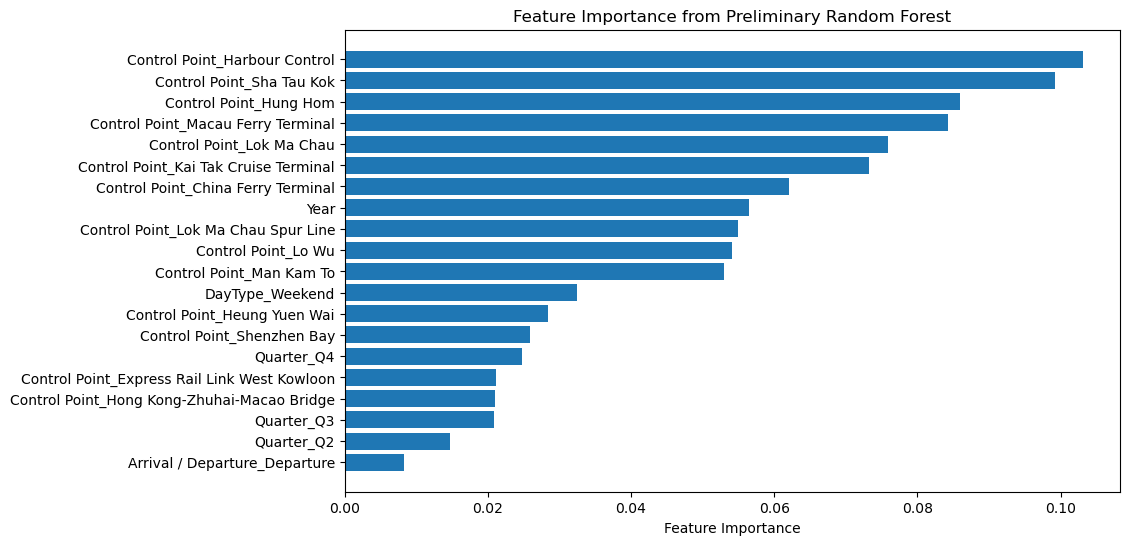

In [23]:
clf_prelim = RandomForestClassifier(n_estimators=200, random_state=42)
clf_prelim.fit(X_encoded, y)

# Compute feature importances
importances = clf_prelim.feature_importances_
feature_names = X_encoded.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Show ranked features
print("Feature Importance Ranking:")
print(importance_df)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Preliminary Random Forest')
plt.gca().invert_yaxis()
plt.show()


### Step 4: Split Data and Train Final Model

In [26]:
X = X_encoded

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf_final = RandomForestClassifier(n_estimators=200, random_state=42)
clf_final.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

### Step 5: Final Evaluation

In [ ]:
y_pred = clf_final.predict(X_test)

print("📊 Final Classification Report:")
print(classification_report(y_test, y_pred))

print("🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

📊 Final Classification Report:
              precision    recall  f1-score   support

        High       0.90      0.93      0.91      1442
         Low       0.91      0.91      0.91      1442
      Medium       0.85      0.82      0.83      1441

    accuracy                           0.89      4325
   macro avg       0.89      0.89      0.89      4325
weighted avg       0.89      0.89      0.89      4325

🧾 Confusion Matrix:
[[1340    0  102]
 [  17 1316  109]
 [ 131  128 1182]]


## 2. Control Port Classification

In this task, we aim to classify the Control Point based on features such as visitor numbers, direction of travel, and time-related attributes.  

### Step 1: Import Libraries

We start by importing the necessary libraries for data handling, model training, evaluation, and plotting.

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset and parse 'Date' column
df = pd.read_csv('/Users/sarek/PycharmProjects/cs5483_g29/dataset/hkdata_2023_2024.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

### Step 2: Explore Target Variable – Control Point

We check the distribution of the target variable `Control Point` to understand class balance.

In [38]:
# Check the distribution of ports
print("Port Distribution:")
df['Control Point'].value_counts()

Port Distribution:


Control Point
Airport                           1462
Express Rail Link West Kowloon    1462
Lo Wu                             1462
Lok Ma Chau Spur Line             1462
Heung Yuen Wai                    1462
Hong Kong-Zhuhai-Macao Bridge     1462
Lok Ma Chau                       1462
Man Kam To                        1462
Sha Tau Kok                       1462
Shenzhen Bay                      1462
China Ferry Terminal              1462
Harbour Control                   1462
Kai Tak Cruise Terminal           1462
Macau Ferry Terminal              1462
Hung Hom                          1154
Name: count, dtype: int64

### Step 4: Define Features and Target

We use numerical and categorical variables (excluding 'Date') to predict the port. The target is `Control Point`.

In [39]:
# Define features and target
features = ['Arrival / Departure', 'DayType', 'Year', 'Quarter',
            'Hong Kong Residents', 'Mainland Visitors', 'Other Visitors', 'Total']
X = df[features]
y = df['Control Point']

### Step 5: One-Hot Encode Categorical Features

We convert categorical features to numerical using one-hot encoding.

In [40]:
# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['Arrival / Departure', 'DayType', 'Quarter'], drop_first=True)

### Step 6: Split Data into Train and Test Sets

We split the data while maintaining the distribution of classes using stratified sampling.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Step 7: Train a Random Forest Model to Evaluate Feature Importance

We train the model and sort features by their calculated importance.

In [43]:
# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

# Compute and sort feature importances
importances = clf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Show top features
print("\nFeature Importance Ranking:")
print(importance_df)


Feature Importance Ranking:
                         Feature  Importance
3                 Other Visitors    0.373968
1            Hong Kong Residents    0.203640
4                          Total    0.194654
2              Mainland Visitors    0.160482
0                           Year    0.020374
6                DayType_Weekend    0.012128
9                     Quarter_Q4    0.011697
8                     Quarter_Q3    0.008595
5  Arrival / Departure_Departure    0.007700
7                     Quarter_Q2    0.006760


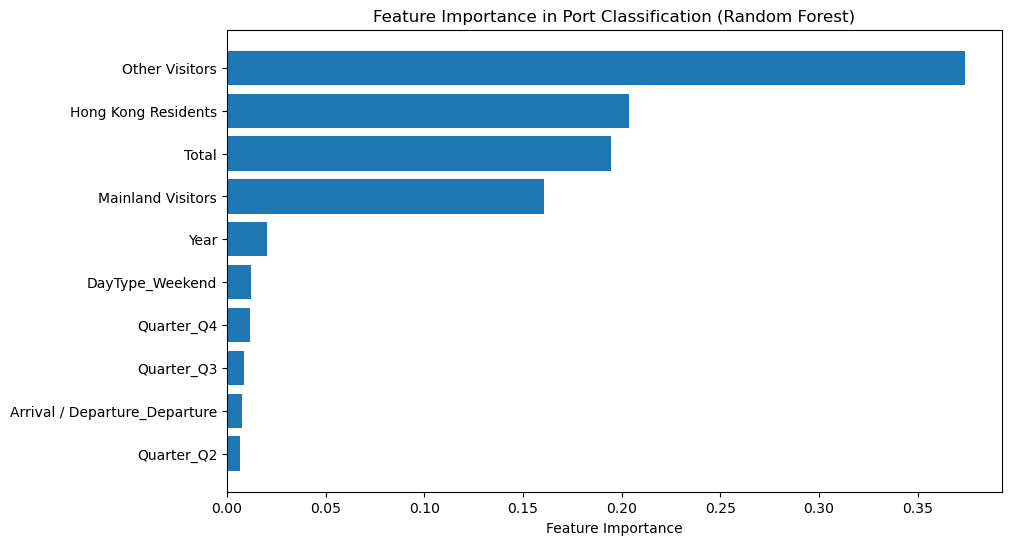

In [44]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Port Classification (Random Forest)')
plt.gca().invert_yaxis()
plt.show()


### Step 8: Select Top Features Based on Importance

We select the top 5 most important features to reduce model complexity and improve interpretability.

In [46]:
# Select top 5 features
top_features = importance_df['Feature'].iloc[:5].tolist()
print("\nSelected Top Features:", top_features)

X_top = X[top_features]


Selected Top Features: ['Other Visitors', 'Hong Kong Residents', 'Total', 'Mainland Visitors', 'Year']


### Step 9: Retrain Model Using Top Features and Evaluate

We retrain the model using only the selected top features and evaluate its performance.


In [47]:
# Split the reduced feature dataset
X_train_top, X_test_top, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42, stratify=y
)

# Train the model again using selected features
clf_top = RandomForestClassifier(n_estimators=200, random_state=42)
clf_top.fit(X_train_top, y_train)

# Make predictions and evaluate
y_pred_top = clf_top.predict(X_test_top)

print("\n📊 Classification Report (Using Top Features):")
print(classification_report(y_test, y_pred_top))

print("\n🧾 Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_top)
print(conf_matrix)


📊 Classification Report (Using Top Features):
                                precision    recall  f1-score   support

                       Airport       0.98      0.98      0.98       292
          China Ferry Terminal       0.94      0.94      0.94       292
Express Rail Link West Kowloon       0.91      0.89      0.90       292
               Harbour Control       0.98      0.88      0.93       293
                Heung Yuen Wai       0.94      0.92      0.93       293
 Hong Kong-Zhuhai-Macao Bridge       0.96      0.93      0.95       292
                      Hung Hom       0.29      0.65      0.40       231
       Kai Tak Cruise Terminal       0.91      0.30      0.46       293
                         Lo Wu       0.91      0.84      0.87       293
                   Lok Ma Chau       0.91      0.88      0.90       292
         Lok Ma Chau Spur Line       0.91      0.87      0.89       292
          Macau Ferry Terminal       0.95      0.97      0.96       293
                